# L1. Dead Reckoning 

### Define all the imports

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Change to main repo folder for the imports
_, dir = os.path.split(os.getcwd())
if dir == 'notebooks': 
    os.chdir('..')
    sys.path.append(os.getcwd())
pd.set_option('mode.chained_assignment', None)

In [3]:
from src.localization.dead_reckoning import DeadReckoning

### Load a dataset

`self = DeadReckoning(dataset, robot, end_frame)`

Creamos una instancia de la clase 'DeadReckoning' con un paso de parámetros inicial para 
inicializar la clase. A partir de ahora podré usar sus métos y atributos. De hecho, con 
esta instanciación que le asignamos `self` haré referencia durante toda la práctica al resto
de métodos y atributos de la clase con este nombre.

`self.run()`

Inicializa el estado del robot. Establece el punto inicial del robot (su `groundtruth`).
A continuación:
    
- Dibujara el trazado del `groundtruth` en color azul.
- Dibujará también el trazado de su `estimación` en color rojo.
- También las ubicaciones reales de los _Landmarks_.



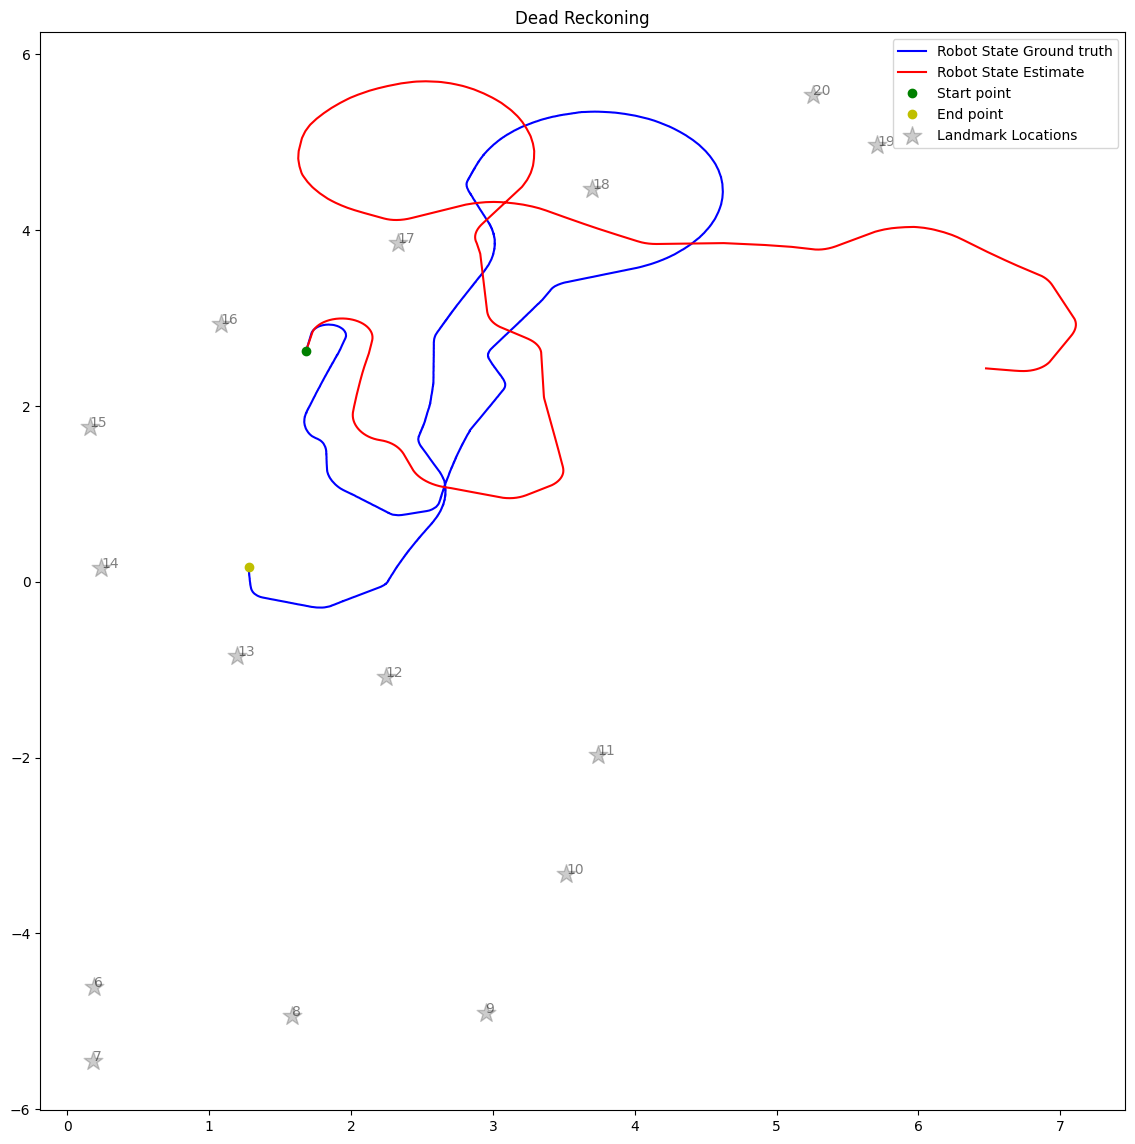

In [4]:
# Define dataset to read
dataset = "data/MRCLAM_Dataset2" # Dataset
end_frame = 20000 # Extension of the dataset
robot = 'Robot3' # Robot

# Build dead reckoning object
self = DeadReckoning(dataset, robot, end_frame)
self.run()

#### De que forma es el array `self.data` que tanto se emplea en **`DeadReckoning.py`**?

In [5]:
self.data.shape

(20000, 4)

In [6]:
# Veremos todos los elementos como si fuesen cadenas de texto.
# Mejoramos la visualización al no tener que verlo en notación científica.
np.set_printoptions(formatter={'all':lambda x: str(x)})

In [7]:
self.data[-20:]

array([[1248275695.505, -1.0, 0.067, -0.005],
       [1248275695.515, -1.0, 0.067, -0.002],
       [1248275695.525, -1.0, 0.067, 0.005],
       [1248275695.535, -1.0, 0.067, 0.007],
       [1248275695.546, -1.0, 0.067, 0.007],
       [1248275695.556, -1.0, 0.067, 0.005],
       [1248275695.566, -1.0, 0.067, 0.002],
       [1248275695.576, -1.0, 0.067, -0.0],
       [1248275695.587, -1.0, 0.067, -0.007],
       [1248275695.607, -1.0, 0.067, -0.009],
       [1248275695.617, -1.0, 0.067, -0.009],
       [1248275695.627, -1.0, 0.067, -0.009],
       [1248275695.638, -1.0, 0.067, -0.002],
       [1248275695.658, -1.0, 0.067, 0.002],
       [1248275695.668, -1.0, 0.067, 0.007],
       [1248275695.678, -1.0, 0.067, 0.009],
       [1248275695.691, 23.0, 2.784, -0.296],
       [1248275695.691, 32.0, 2.396, 0.322],
       [1248275695.699, -1.0, 0.067, 0.009],
       [1248275695.709, -1.0, 0.067, 0.007]])

### TASK 1. Inspect the dataset
The objective of this task is to understand how the control inputs used to estimate the robots localization may differ from the actual robot motion.

Go through the following blocks of code while understanding what the different functions do. Add a markdown block after each block of code explaining what its being done, and add titles and legends to the plots to demonstrate your understanding.

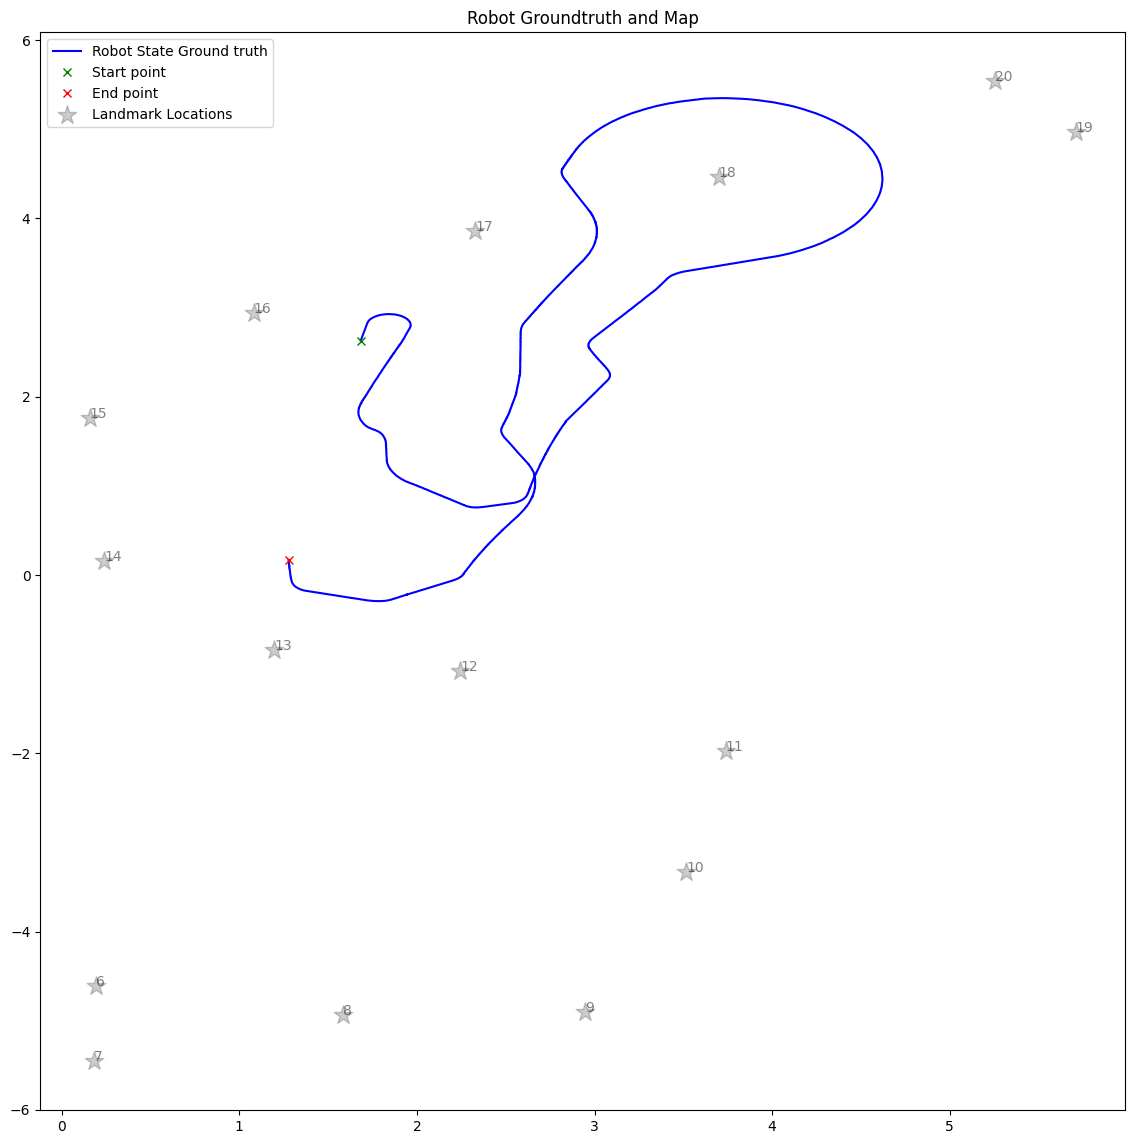

In [8]:
# Build dataframes
self.build_dataframes()

# Represent dataset
self.represent_dataset()

In [9]:
# El type no es el número de Subject, es el Barcode
self.measurements

,type,range_l,bearing_l
stamp,,,
2009-07-22 15:10:04.938999808,-1.0,0.067,0.000
2009-07-22 15:10:04.980000000,-1.0,0.067,0.000
2009-07-22 15:10:05.010999808,-1.0,0.067,0.000
2009-07-22 15:10:05.030999808,-1.0,0.067,0.000
2009-07-22 15:10:05.040999936,-1.0,0.067,0.000
...,...,...,...
2009-07-22 15:14:55.677999872,-1.0,0.067,0.009
2009-07-22 15:14:55.691000064,23.0,2.784,-0.296
2009-07-22 15:14:55.691000064,32.0,2.396,0.322


### Ver las medidas sólo de los robots que se encuentra por el camino `robot_df`.

2 maneras:

- Se realiza un left join entre self.landmarks y self.sensor. La columna _merge se agrega automáticamente y contiene información sobre la fuente de cada fila (si está en self.landmarks o en self.sensor). Luego, se filtran las filas donde _merge es igual a `left_only`, (que están en self.landmarks pero no en self.sensor). El DataFrame robot_df contendrá todas las filas que están en `self.landmarks` pero no en `self.sensor`.
- `pd.concat([self.landmarks, self.sensor, self.sensor])` concatena los dos DataFrames, self.landmarks y self.sensor. Al concatenar self.sensor dos veces, te aseguras de que todas las filas de self.sensor se eliminen cuando apliques `drop_duplicates(keep=False)` elimina las filas duplicadas en el DataFrame resultante. Al especificar `keep=False`, todas las filas duplicadas se eliminarán, dejando solo las filas que están en self.landmarks pero no en self.sensor.

In [10]:
"""
# OPCIÓN 1

# Realiza una combinación izquierda (left join) entre self.landmarks y self.sensor
merged_df = self.landmarks.merge(self.sensor, how='left', indicator=True)

# Filtra las filas que solo están en self.landmarks
robot_df = merged_df[merged_df['_merge'] == 'left_only']

# Elimina la columna '_merge' si no la necesitas en el resultado final
robot_df = robot_df.drop(columns=['_merge'])
"""
robot_df=0 # hago nada

In [11]:
# OPCIÓN 2

# Concatena los DataFrames y elimina duplicados
robot_df = pd.concat([self.landmarks, self.sensor, self.sensor]).drop_duplicates(keep=False)


In [12]:
self.motion.info

<bound method DataFrame.info of                                type      v  omega
stamp                                            
2009-07-22 15:10:04.938999808  -1.0  0.067  0.000
2009-07-22 15:10:04.980000000  -1.0  0.067  0.000
2009-07-22 15:10:05.010999808  -1.0  0.067  0.000
2009-07-22 15:10:05.030999808  -1.0  0.067  0.000
2009-07-22 15:10:05.040999936  -1.0  0.067  0.000
...                             ...    ...    ...
2009-07-22 15:14:55.657999872  -1.0  0.067  0.002
2009-07-22 15:14:55.668000000  -1.0  0.067  0.007
2009-07-22 15:14:55.677999872  -1.0  0.067  0.009
2009-07-22 15:14:55.698999808  -1.0  0.067  0.009
2009-07-22 15:14:55.709000192  -1.0  0.067  0.007

[17958 rows x 3 columns]>

##### Plot linear and angular velocity commands
This is the data we use as an input of our motion model

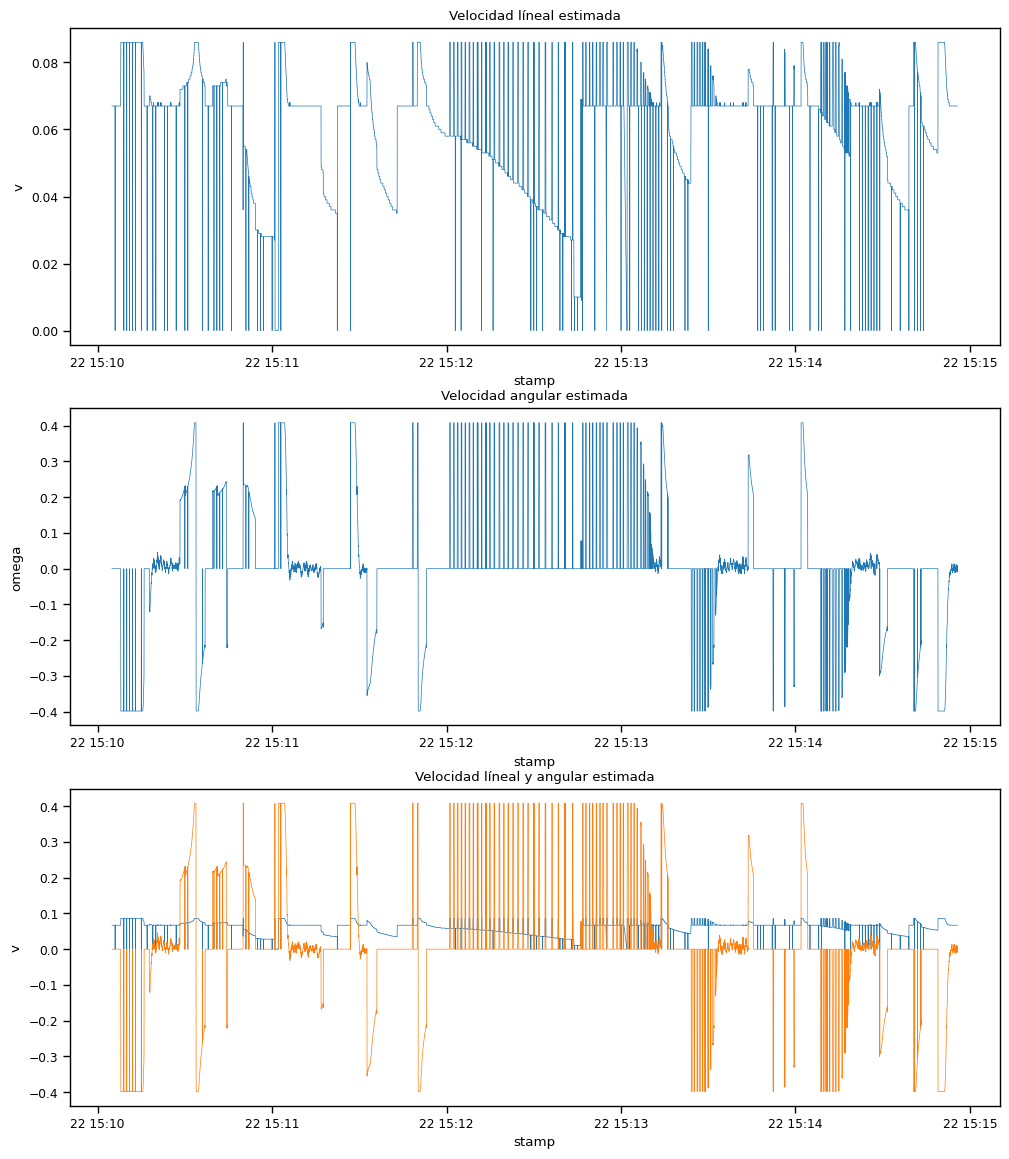

In [13]:
sns.set_context("paper")
fig, axs = plt.subplots(3, 1, figsize=[12,14])
sns.lineplot(data=self.motion, x="stamp", y="v", ax=axs[0], linewidth=0.5)
axs[0].set_title("Velocidad líneal estimada")
sns.lineplot(data=self.motion, x="stamp", y="omega", ax=axs[1], linewidth=0.5)
axs[1].set_title("Velocidad angular estimada")
sns.lineplot(data=self.motion, x="stamp", y="v", ax=axs[2], linewidth=0.5)
sns.lineplot(data=self.motion, x="stamp", y="omega", ax=axs[2], linewidth=0.5)
axs[2].set_title("Velocidad líneal y angular estimada")
plt.show()

##### Compare with groundtruth

In [14]:
self.motion

,type,v,omega
stamp,,,
2009-07-22 15:10:04.938999808,-1.0,0.067,0.000
2009-07-22 15:10:04.980000000,-1.0,0.067,0.000
2009-07-22 15:10:05.010999808,-1.0,0.067,0.000
2009-07-22 15:10:05.030999808,-1.0,0.067,0.000
2009-07-22 15:10:05.040999936,-1.0,0.067,0.000
...,...,...,...
2009-07-22 15:14:55.657999872,-1.0,0.067,0.002
2009-07-22 15:14:55.668000000,-1.0,0.067,0.007
2009-07-22 15:14:55.677999872,-1.0,0.067,0.009


In [15]:
self.gt

,x,y,theta
stamp,,,
2009-07-22 15:10:04.920999936,1.683462,2.628265,1.3663
2009-07-22 15:10:04.966000128,1.683418,2.628294,1.3663
2009-07-22 15:10:05.000000000,1.683385,2.628285,1.3663
2009-07-22 15:10:05.020999936,1.683394,2.628222,1.3663
2009-07-22 15:10:05.025000192,1.683424,2.628215,1.3663
...,...,...,...
2009-07-22 15:14:55.621999872,1.279208,0.163900,1.6122
2009-07-22 15:14:55.653000192,1.278423,0.165382,1.6068
2009-07-22 15:14:55.660000000,1.277985,0.166038,1.6042


### Generamos un nuevo dataframe `self.motion_gt` mediante el uso del método join() de `Pandas`.

Este nuevo dataframe contendrá las columnas de los dataframe `motion` y `gt`.

- El dataframe `motion` contiene la velocidad lineal y angular (*v* y *ω*).
- El dataframe `gt` contiene el groundtruth del robot en (*x*, *y*, *theta*).

Con estos datos generaremos nuevas columnas donde representaremos las:

- Diferencias de posición de *x*, *y*, *z* y *timestamp*. $$dx = x_{t} - x_{t-1}$$ 
$$dy = y_{t} - y_{t-1}$$
$$dtheta = \theta_{t} - \theta_{t-1}$$
$$dt = stamp_{t} - stamp_{t-1}$$

- Para obtener `v_gt`y `omega_gt` deberemos:
    
$$v_{gt} = \dfrac{\sqrt{dx² + dy²}}{dt}$$
$$omega_{gt} = \dfrac{dtheta}{dt} $$
    

In [16]:
# Generate groundtruth speeds from GT for comparison
self.motion_gt = self.motion.join(self.gt).dropna()
self.motion_gt['dx'] = self.motion_gt['x'].diff()
self.motion_gt['dy'] = self.motion_gt['y'].diff()
self.motion_gt['dtheta'] = self.motion_gt['theta'].diff()
# Con la librería pandas tenemos la función total_seconds() que
# Devuelve la duración total de cada elemento expresada en segundos.
self.motion_gt['dt'] = self.motion_gt.index.to_series().diff().dt.total_seconds()

self.motion_gt['v_gt'] = np.linalg.norm([self.motion_gt['dx'],self.motion_gt['dy']],axis=0)/self.motion_gt['dt']
self.motion_gt['omega_gt'] = self.motion_gt['dtheta']/self.motion_gt['dt']
self.motion_gt.head()

,type,v,omega,x,y,theta,dx,dy,dtheta,dt,v_gt,omega_gt
stamp,,,,,,,,,,,,
2009-07-22 15:10:08.379000064,-1.0,0.086,-0.398,1.721801,2.831794,1.2653,NaN,NaN,NaN,NaN,NaN,NaN
2009-07-22 15:10:11.008999936,-1.0,0.000,0.000,1.805327,2.920559,0.2314,0.083527,0.088766,-1.0339,2.630,0.046344,-0.393118
2009-07-22 15:10:11.172000000,-1.0,0.086,-0.398,1.813401,2.922999,0.1640,0.008074,0.002439,-0.0674,0.163,0.051743,-0.413497
2009-07-22 15:10:16.634000128,-1.0,0.067,0.000,1.956318,2.756269,-1.8605,0.142917,-0.166729,-2.0245,5.462,0.040205,-0.370652
2009-07-22 15:10:18.412000000,-1.0,0.068,-0.041,1.922942,2.639079,-1.8981,-0.033375,-0.117190,-0.0376,1.778,0.068532,-0.021147


### Visualización de las velocidades estimadas y reales (lineal y angular)

Vale la pena apreciar en el mismo instante de tiempo los valores que estimamos y los que realmente realiza.

Esto pone de manifiesto que existe **ruido en el movimiento (`motion`)**.

Compara las columnas `v` con `v_gt` y `omega` con `omega_gt` para el mismo instante de tiempo.

In [17]:
## Diferencia entre la velocidad estimada y la velocidad real (lineal y angular)

self.motion_gt[['v','v_gt','omega','omega_gt']]

,v,v_gt,omega,omega_gt
stamp,,,,
2009-07-22 15:10:08.379000064,0.086,NaN,-0.398,NaN
2009-07-22 15:10:11.008999936,0.000,0.046344,0.000,-0.393118
2009-07-22 15:10:11.172000000,0.086,0.051743,-0.398,-0.413497
2009-07-22 15:10:16.634000128,0.067,0.040205,0.000,-0.370652
2009-07-22 15:10:18.412000000,0.068,0.068532,-0.041,-0.021147
...,...,...,...,...
2009-07-22 15:14:52.839000064,0.068,0.058008,-0.036,-0.241485
2009-07-22 15:14:53.470000128,0.067,0.068512,-0.002,-0.038193
2009-07-22 15:14:53.938999808,0.067,0.073578,0.002,-0.020256


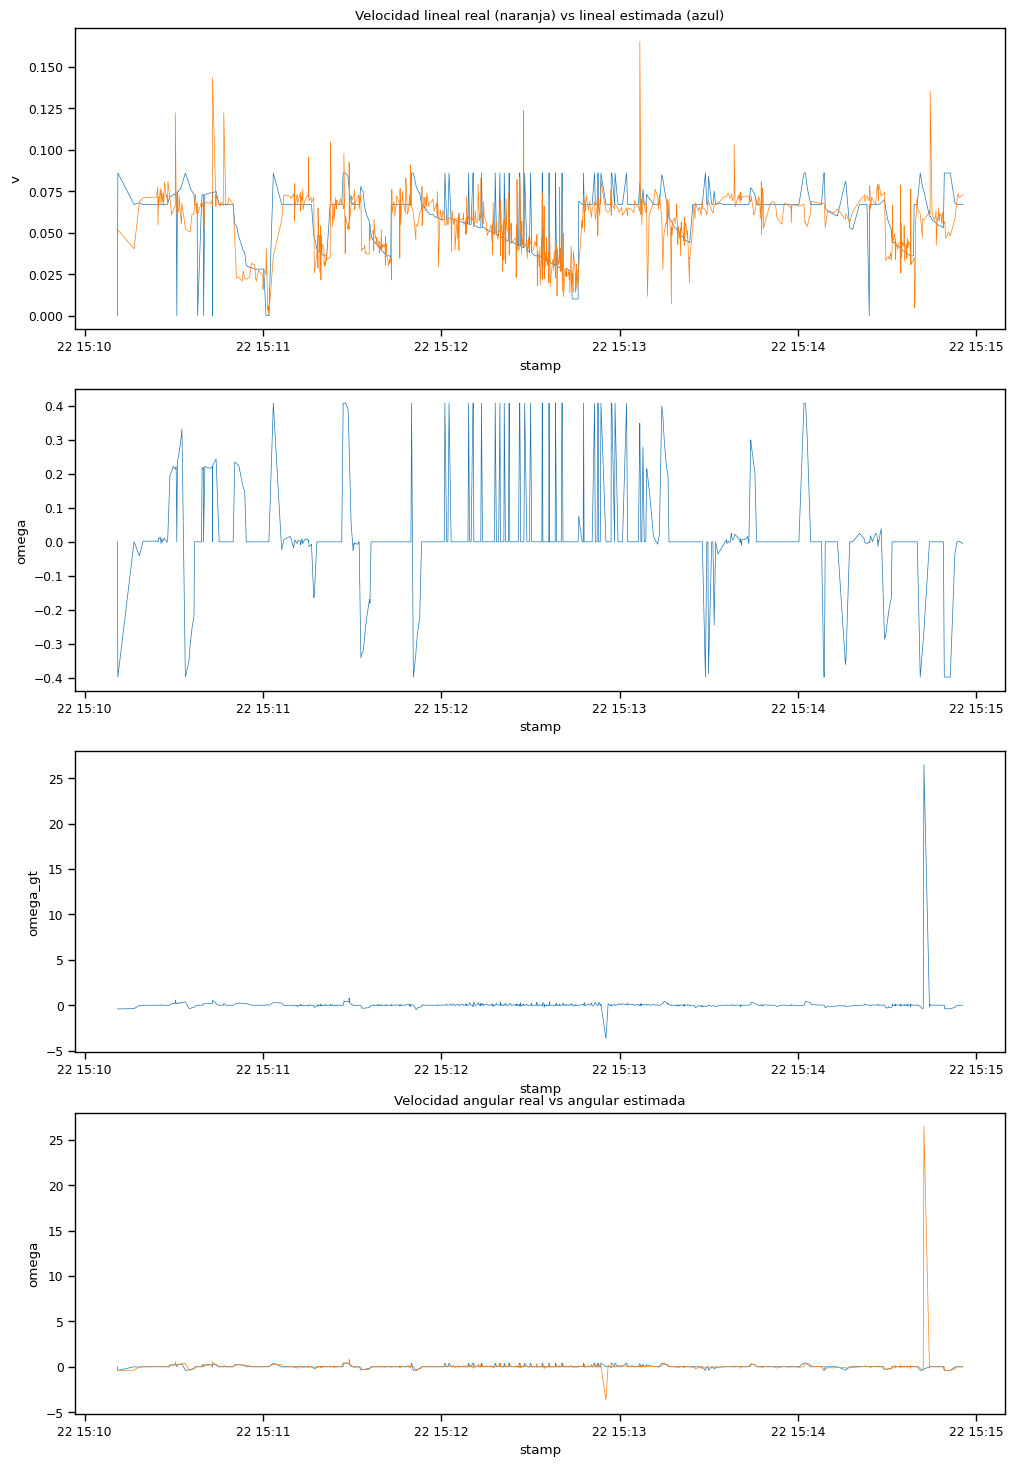

In [18]:
# Plot commands and GT velocities
sns.set_context("paper")
self.motion_gt = self.motion_gt.dropna()
fig, axs = plt.subplots(4, 1, figsize=[12,18])
sns.lineplot(data=self.motion_gt, x="stamp", y="v", ax=axs[0], linewidth=0.5)
sns.lineplot(data=self.motion_gt, x="stamp", y="v_gt", ax=axs[0], linewidth=0.5)
axs[0].set_title("Velocidad lineal real (naranja) vs lineal estimada (azul)")
sns.lineplot(data=self.motion_gt, x="stamp", y="omega", ax=axs[1], linewidth=0.5)
sns.lineplot(data=self.motion_gt, x="stamp", y="omega_gt", ax=axs[2], linewidth=0.5)
sns.lineplot(data=self.motion_gt, x="stamp", y="omega", ax=axs[3], linewidth=0.5)
sns.lineplot(data=self.motion_gt, x="stamp", y="omega_gt", ax=axs[3], linewidth=0.5)
axs[3].set_title("Velocidad angular real vs angular estimada")
plt.show()

### Errores de `v` y `omega`

Con las diferencias cuadráticas se penalizan más los errores acentuando estas diferencias.

$$v\_e = (v\_gt)^2 - v^2$$
$$omega\_e = (omega\_gt)^2 - omega^2$$

Y a continuación los representamos gráficamente.

<AxesSubplot: xlabel='stamp', ylabel='omega_e'>

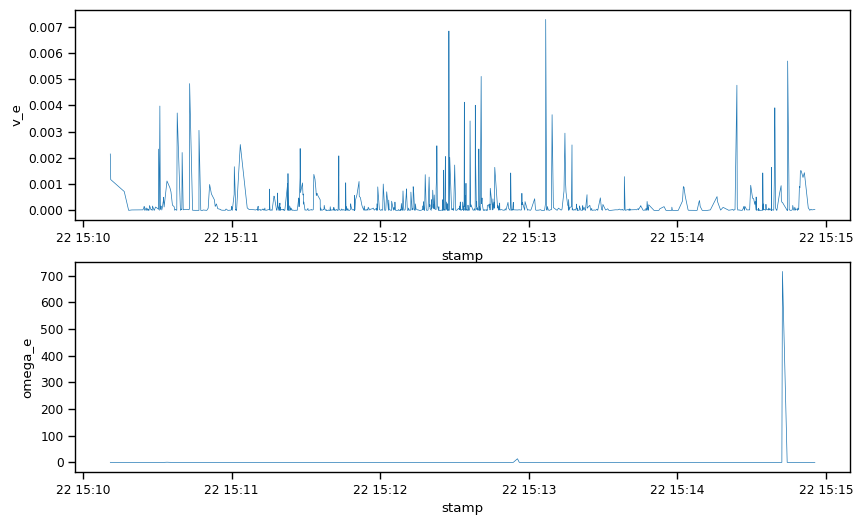

In [19]:
# Get error
self.motion_gt['v_e'] = np.power(self.motion_gt['v_gt'] - self.motion_gt['v'],2)
self.motion_gt['omega_e'] =  np.power(self.motion_gt['omega_gt'] - self.motion_gt['omega'],2)

fig, axs = plt.subplots(2, 1, figsize=[10,6])
sns.lineplot(data=self.motion_gt, x="stamp", y="v_e", ax=axs[0], linewidth=0.5)
sns.lineplot(data=self.motion_gt, x="stamp", y="omega_e", ax=axs[1], linewidth=0.5)


### Limpieza de los outliers

Tanto `self.motion_gt` con los resultados que hemos visto en las gráficas de `omega` y `omega_gt`como 
en los errores obtenidos en las diferencias cuadráticas `omega_e` casi al final
vemos que tenemos un pincho que no hace más que distorsionar mis resultados.

Voy a cargarme este **outlier** y ver que ocurre. Para ello,lo eliminaré de raíz.

Imponiendo la condición que si se pasa de un valor elimino esa fila.

Esto lo hago para `omega`y `omega_gt` por propagación el error ya saldrá corregido. Basta que sea > 5.

Cuando impongo esta restricción aparece otro **outlier** negativo del orden de -3. Me lo cargo también

In [20]:

# Eliminar filas donde 'omega_gt'es mayor que 5 y menor que -2 
# son los dos outliers que he visto

self.motion_gt = self.motion_gt[~(self.motion_gt['omega_gt'] < -2)]
self.motion_gt = self.motion_gt[~(self.motion_gt['omega_gt'] > 5)]

### Representación nuevamente de las gráficas tras eliminar *outliers*

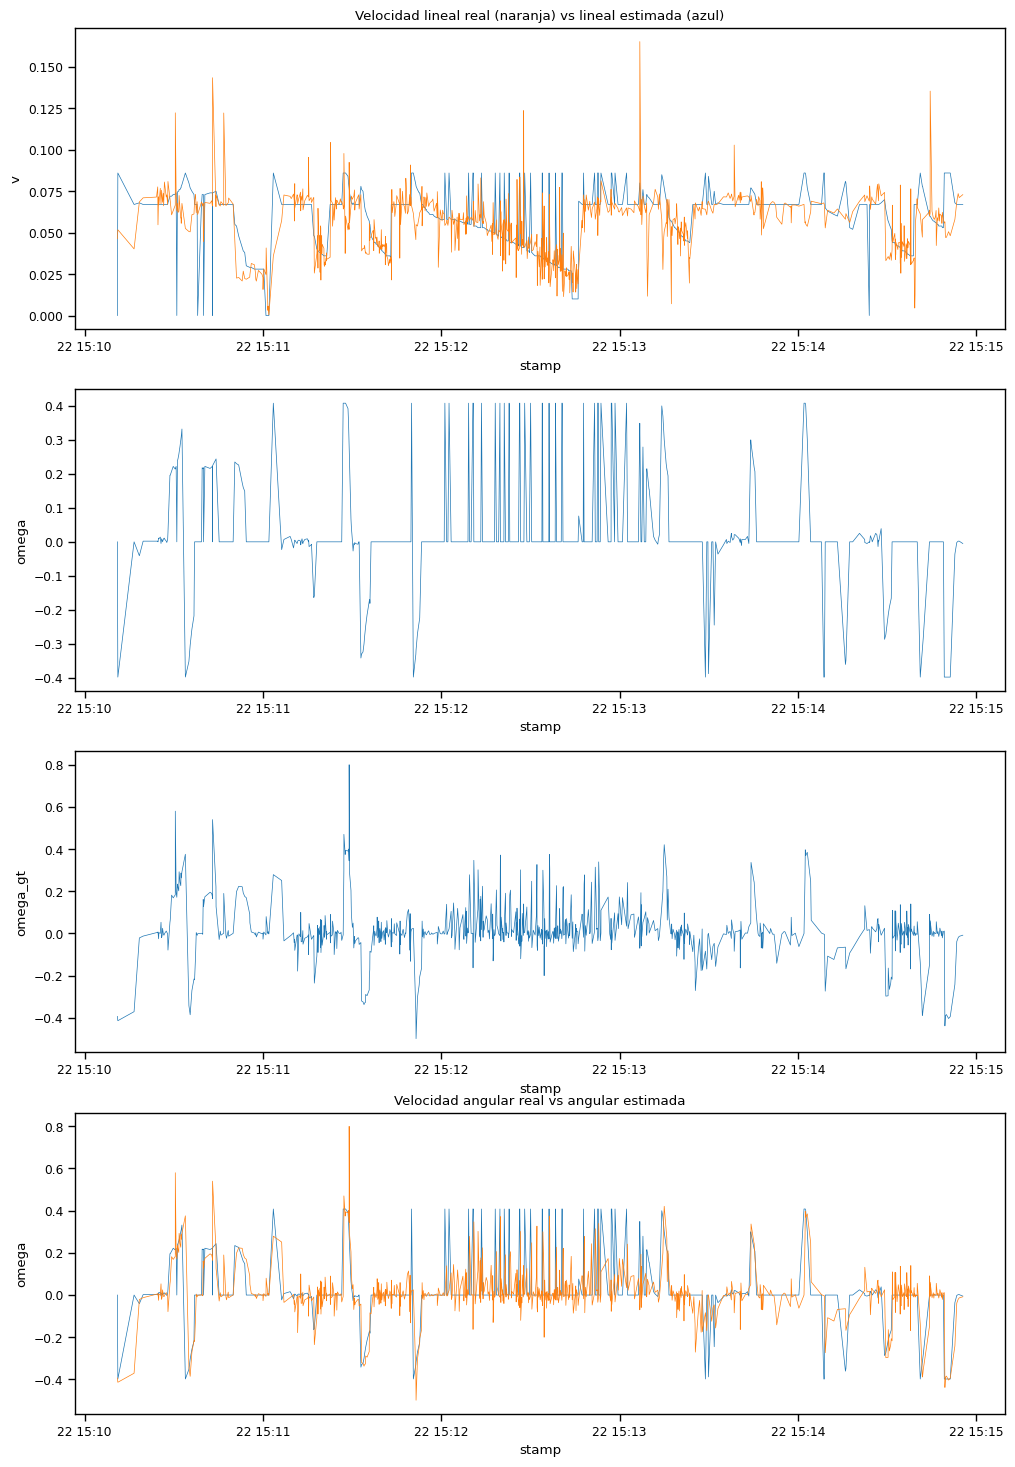

In [21]:
# Plot commands and GT velocities
sns.set_context("paper")
self.motion_gt = self.motion_gt.dropna()
fig, axs = plt.subplots(4, 1, figsize=[12,18])
sns.lineplot(data=self.motion_gt, x="stamp", y="v", ax=axs[0], linewidth=0.5)
sns.lineplot(data=self.motion_gt, x="stamp", y="v_gt", ax=axs[0], linewidth=0.5)
axs[0].set_title("Velocidad lineal real (naranja) vs lineal estimada (azul)")
sns.lineplot(data=self.motion_gt, x="stamp", y="omega", ax=axs[1], linewidth=0.5)
sns.lineplot(data=self.motion_gt, x="stamp", y="omega_gt", ax=axs[2], linewidth=0.5)
sns.lineplot(data=self.motion_gt, x="stamp", y="omega", ax=axs[3], linewidth=0.5)
sns.lineplot(data=self.motion_gt, x="stamp", y="omega_gt", ax=axs[3], linewidth=0.5)
axs[3].set_title("Velocidad angular real vs angular estimada")
plt.show()

In [ ]:
### Generamos un nuevo dataframe `self.motion_gt` mediante el uso del método join() de `Pandas`.

Este nuevo dataframe contendrá las columnas de los dataframe `motion` y `gt`.

- El dataframe `motion` contiene la velocidad lineal y angular (*v* y *ω*).
- El dataframe `gt` contiene el groundtruth del robot en (*x*, *y* y *theta*).
    
    
    

### Volver a calcular los errores y nueva representación

<AxesSubplot: xlabel='stamp', ylabel='omega_e'>

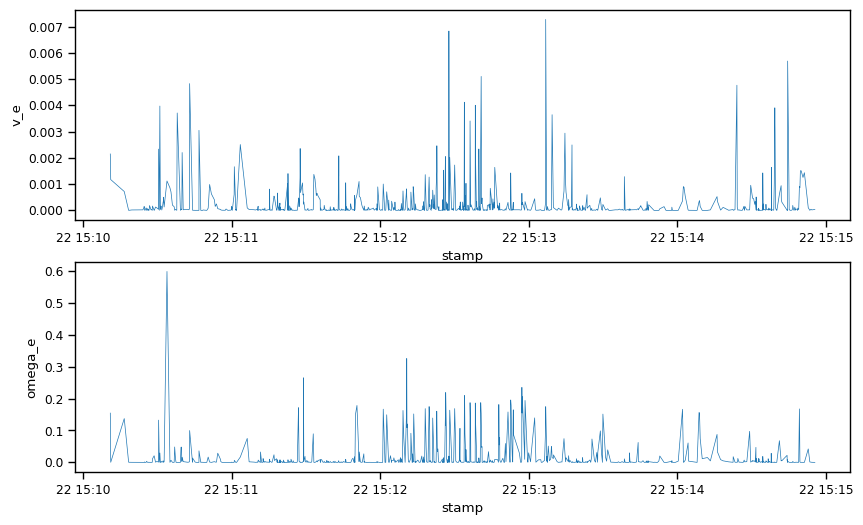

In [22]:
# Get error
self.motion_gt['v_e'] = np.power(self.motion_gt['v_gt'] - self.motion_gt['v'],2)
self.motion_gt['omega_e'] =  np.power(self.motion_gt['omega_gt'] - self.motion_gt['omega'],2)

fig, axs = plt.subplots(2, 1, figsize=[10,6])
sns.lineplot(data=self.motion_gt, x="stamp", y="v_e", ax=axs[0], linewidth=0.5)
sns.lineplot(data=self.motion_gt, x="stamp", y="omega_e", ax=axs[1], linewidth=0.5)


In [23]:
self.motion_gt.info

<bound method DataFrame.info of                                type      v  omega         x         y   theta  \
stamp                                                                           
2009-07-22 15:10:11.008999936  -1.0  0.000  0.000  1.805327  2.920559  0.2314   
2009-07-22 15:10:11.172000000  -1.0  0.086 -0.398  1.813401  2.922999  0.1640   
2009-07-22 15:10:16.634000128  -1.0  0.067  0.000  1.956318  2.756269 -1.8605   
2009-07-22 15:10:18.412000000  -1.0  0.068 -0.041  1.922942  2.639079 -1.8981   
2009-07-22 15:10:19.681999872  -1.0  0.067  0.002  1.892399  2.554229 -1.9138   
...                             ...    ...    ...       ...       ...     ...   
2009-07-22 15:14:52.839000064  -1.0  0.068 -0.036  1.291426 -0.036140  1.6593   
2009-07-22 15:14:53.470000128  -1.0  0.067 -0.002  1.287675  0.006928  1.6352   
2009-07-22 15:14:53.938999808  -1.0  0.067  0.002  1.284736  0.041311  1.6257   
2009-07-22 15:14:54.287000064  -1.0  0.067  0.002  1.282985  0.066008  1.6210

### TASK 2. Estimate localization with dead reckoning

The objective of this task is getting a localization estimate by dead reckoning, and compare the obtained result with the groundtruth using three different error metrics.

Please review what the self.run() function does this is the function we executed at the begining of the notebook. Then postproces the obtained estimation and analize the quality of it. 

### Corrección

En realidad únicamente visualizaremos dos métricas de error:
    
    - ATE
    - Error final

In [24]:
self.states.head()

,x,y,theta
stamp,,,
2009-07-22 15:10:04.920999936,1.683462,2.628265,1.3663
2009-07-22 15:10:04.938999808,1.683707,2.629446,1.3663
2009-07-22 15:10:04.980000000,1.684264,2.632135,1.3663
2009-07-22 15:10:05.010999808,1.684686,2.634169,1.3663
2009-07-22 15:10:05.030999808,1.684958,2.635481,1.3663


In [25]:
self.gt.head()

,x,y,theta
stamp,,,
2009-07-22 15:10:04.920999936,1.683462,2.628265,1.3663
2009-07-22 15:10:04.966000128,1.683418,2.628294,1.3663
2009-07-22 15:10:05.000000000,1.683385,2.628285,1.3663
2009-07-22 15:10:05.020999936,1.683394,2.628222,1.3663
2009-07-22 15:10:05.025000192,1.683424,2.628215,1.3663


### Unión de los 2 dataframes `states` y `gt`

Con estos dos dataframes construimos uno vinculados por su `stamp`.

Los valores ya están en formato (*x*, *y*, *theta*)

`states` tiene las trayectorías "estimadas" en la función `motion_update():`.

`gt`tiene las trayectorias "reales" que venían dadas por el array `groundtruth_data`.

In [26]:
data = self.states.join(self.gt,rsuffix='_gt').dropna()
data.head()

,x,y,theta,x_gt,y_gt,theta_gt
stamp,,,,,,
2009-07-22 15:10:04.920999936,1.683462,2.628265,1.366300,1.683462,2.628265,1.3663
2009-07-22 15:10:08.379000064,1.735027,2.860235,1.180434,1.721801,2.831794,1.2653
2009-07-22 15:10:11.008999936,1.894577,2.992075,0.181852,1.805327,2.920559,0.2314
2009-07-22 15:10:11.172000000,1.908418,2.994280,0.116978,1.813401,2.922999,0.1640
2009-07-22 15:10:16.634000128,2.142412,2.702252,-1.721803,1.956318,2.756269,-1.8605


#### Absolute Trajectory Error (ATE)

El *ATE* es la diferencia entre la trayectoria real y la trayectoria estimada.

Esta definido como el`root mean square error`o `rmse` de los errores de la distancias.

$$ATE_{rmse} = ATE = \sqrt{\dfrac{\sum_{i=1}^{n} (error\_d(i))²}{n}}$$

Donde `error_d`el ***Error de distancia*** que mide la distancia entre cada pareja de puntos en el mismo instante.

Dicho de otro modo. Es la *norma*:

$$error\_d = \sqrt{ (error\_x)² + (error\_y)²}$$

Estos valores de `error_x` y `error_y` los obtenemos de los ***Errores en las coordenadas***.

Para cada valor obtenido a lo largo del tiempo que resultan de la diferencia entre la estimación y el valor real.

$$error\_x = \lvert{x - x\_gt}\rvert$$
$$error\_y = \lvert{y - y\_gt}\rvert$$

Y si hiciese falta para `theta`

$$error\_theta = \lvert{theta - theta\_gt}\rvert$$

In [27]:
# Errores en las coordenadas
data['error_x'] = abs(data['x_gt']-data['x'])
data['error_y'] = abs(data['y_gt']-data['y'])
data['error_theta'] = abs(data['theta_gt']-data['theta'])

# Error de distancia

data['error_d'] = np.sqrt(data['error_x']**2 + data['error_y']**2)
data.tail()

,x,y,theta,x_gt,y_gt,theta_gt,error_x,error_y,error_theta,error_d
stamp,,,,,,,,,,
2009-07-22 15:14:52.839000064,6.666899,2.403224,3.019194,1.291426,-0.036140,1.6593,5.375473,2.439363,1.359894,5.903067
2009-07-22 15:14:53.470000128,6.624918,2.408631,3.010061,1.287675,0.006928,1.6352,5.337243,2.401703,1.374861,5.852720
2009-07-22 15:14:53.938999808,6.593765,2.412739,3.011503,1.284736,0.041311,1.6257,5.309029,2.371428,1.385803,5.814590
2009-07-22 15:14:54.287000064,6.570648,2.415780,3.010127,1.282985,0.066008,1.6210,5.287663,2.349772,1.389127,5.786260
2009-07-22 15:14:55.505000192,6.489724,2.426307,3.013949,1.279047,0.154744,1.6111,5.210677,2.271562,1.402849,5.684290


In [ ]:
### Calculamos ahora el Absolute Trajectory Error (ATE)


$$ATE = \sqrt{\dfrac{\sum_{i=1}^{n} (error\_d(i))²}{n}}$$

In [28]:
# Absolute Trajectory Error (ATE)

# data.shape[0] me devolverá el número de filas de dataframe
# Viene a ser lo mismo que len(data)

ate = np.sqrt((data['error_d']**2).sum()/data.shape[0])
ate

2.5862587408583297

### Otro error que podemos calcular es el `error_final`

$$ error\_final = (posicion\_final\_estimada) - (posicion\_final\_gt)$$

Pero eso no es nada más y nada menos que el último valor de nuestro dataframe `data`.

En concreto, o el `error_d_` (*error de distancia*), 
o los (*errores de coordenadas*) de x e y `error_x`, `error_y` respectivamente.

Basta mostrar la última fila de `data`.

`data.iloc[data.index[-1]]` o `data.iloc[-1]` o `data.tail(1)`

El mostrar la última fila y no un valor es porque podemos ver todos los tipos de error calculados antes:
    
    - Error en las coordenadas
    
$$error\_x = \lvert{x - x\_gt}\rvert$$
$$error\_y = \lvert{y - y\_gt}\rvert$$
$$error\_theta = \lvert{theta - theta\_gt}\rvert$$
    
    - Error de distancia

$$error\_d = \sqrt{ (error\_x)² + (error\_y)²}$$

In [29]:
data.iloc[-1][['error_x', 'error_y','error_theta','error_d']]

error_x        5.210677
error_y        2.271562
error_theta    1.402849
error_d        5.684290
Name: 2009-07-22 15:14:55.505000192, dtype: float64

### TASK 3. Iterate over diferent datasets
Here we are interested on executing multiple experiments using different robots and datasets and get the three error metrics from previous blocks for all the experiments and enable further analisis of this errors.

The iterative execution of different experiments will enable as to compare different localization algorithms on further lab sessions.

#### Generate metrics

In [30]:
'''

 Código principal

 Aquí iteraremos sobre 8 DataSets y sobre los 5 robots.
 Obtendremos (más o menos) las errores que hemos calculado antes.
 Por último lo guardaremos todo en un dataFrame 'errors' para su posterior
 análisis.
 
'''
datasets = ["data/MRCLAM_Dataset1",
            "data/MRCLAM_Dataset2",
            "data/MRCLAM_Dataset3",
            "data/MRCLAM_Dataset4",
            "data/MRCLAM_Dataset5",
            "data/MRCLAM_Dataset6",
            "data/MRCLAM_Dataset7",
            "data/MRCLAM_Dataset8"]
robots = ['Robot1',
          'Robot2',
          'Robot3',
          'Robot4',
          'Robot5']

errors = pd.DataFrame(columns=['dataset','robot','ate','error_final'])


# Vaciamos "por si acaso" el dataFrame errors pero manteniendo las columnas
errors = pd.DataFrame(columns=errors.columns)
end_frame = 20000 # Extension of the dataset
    
    
for ds in datasets:
    for rob in robots:
        # Vamos cargando los dataSets haciéndonos valer de la clase creada  al inicio del notebook
        # Define dataset to read
        dataset = ds # Dataset
        robot = rob # Robot
        #Dead Reckoning
        self = DeadReckoning(dataset, robot, end_frame)
        self.plot = False
        self.run()

        # Para calcular el error vamos a construir los dataframes que nos hacen falta
        # que serían únicamente gt y states. Como la función build_timeseries() no está
        # definida en este ámbito directamente ejecutaré self.build_dataframes().
        # Aunque me creará más dataframes de los que necesito, me aseguro que me los creará.
        self.build_dataframes()
        data = self.states.join(self.gt,rsuffix='_gt').dropna()
        
        # Errores en las coordenadas
        data['error_x'] = abs(data['x_gt']-data['x'])
        data['error_y'] = abs(data['y_gt']-data['y'])
        data['error_theta'] = abs(data['theta_gt']-data['theta'])

        # Error de distancia
        data['error_d'] = np.sqrt(data['error_x']**2 + data['error_y']**2)
        
        # Absolute Trajectory Error (ATE)
        a_t_e = np.sqrt((data['error_d']**2).sum()/data.shape[0])        
        
        # Añadimos también el error_final
        error_final = data.iloc[-1]['error_d']

        # Añadimos un nuevo elemento al dataFrame errors
        # al haber quedado obsoleto el método 'append' debo
        # crear una nueva fila y emplear el método 'concat' en su lugar.
        nueva_fila = {'dataset': ds,
            'robot': rob,
            'ate': a_t_e,
            'error_final': error_final}

        errors = pd.concat([errors, pd.DataFrame([nueva_fila])], 
                            ignore_index=True)


#### Represent metrics

In [31]:
# Represent metrics for all experiments
errors.head(10)

,dataset,robot,ate,error_final
0,data/MRCLAM_Dataset1,Robot1,1.164638,1.993005
1,data/MRCLAM_Dataset1,Robot2,1.117089,1.166837
2,data/MRCLAM_Dataset1,Robot3,0.569216,1.135820
3,data/MRCLAM_Dataset1,Robot4,0.447250,0.380489
4,data/MRCLAM_Dataset1,Robot5,3.038325,1.432607
5,data/MRCLAM_Dataset2,Robot1,4.203368,5.894163
6,data/MRCLAM_Dataset2,Robot2,0.997529,1.449885
7,data/MRCLAM_Dataset2,Robot3,2.586259,5.684290
8,data/MRCLAM_Dataset2,Robot4,1.482429,3.158079
9,data/MRCLAM_Dataset2,Robot5,1.111594,1.719554


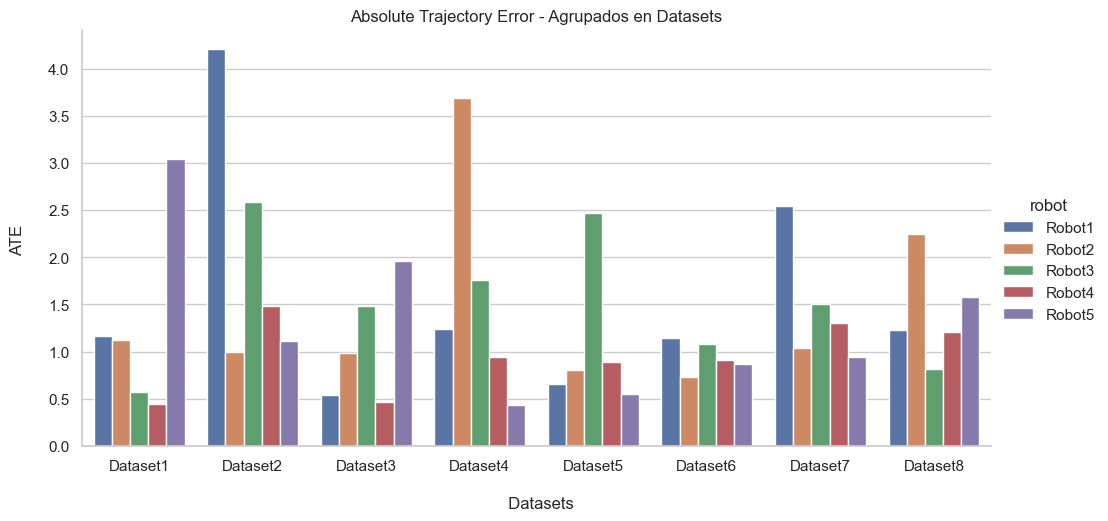

In [32]:
# Representar el ATE de cada robot y de cada dataset en un histograma
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")


# Extraer los últimos 8 caracteres de la etiqueta dataset y ver Dataset_?
# Lo guardo en otra columna para no perder la ruta original al dataset
errors['dataset2'] = errors['dataset'].str[-8:]


# Crear un gráfico de barras para la longitud promedio
g = sns.catplot(data=errors, x='dataset2', y='ate', hue='robot', kind='bar' ,  aspect=2)

# Con estas 5 líneas más abajo puedo girar el título de la etiqueta del eje x 
# y verlas en vertical por si el texto es muy largo y no cabe
# Accede al objeto Axes del gráfico
#ax = g.axes[0, 0]
# Personaliza la rotación de las etiquetas del eje x
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Configurar el título y etiquetas de los ejes
plt.title("Absolute Trajectory Error - Agrupados en Datasets")
plt.xlabel("\n  Datasets")
plt.ylabel("ATE \n")

# Mostrar el gráfico
plt.show()

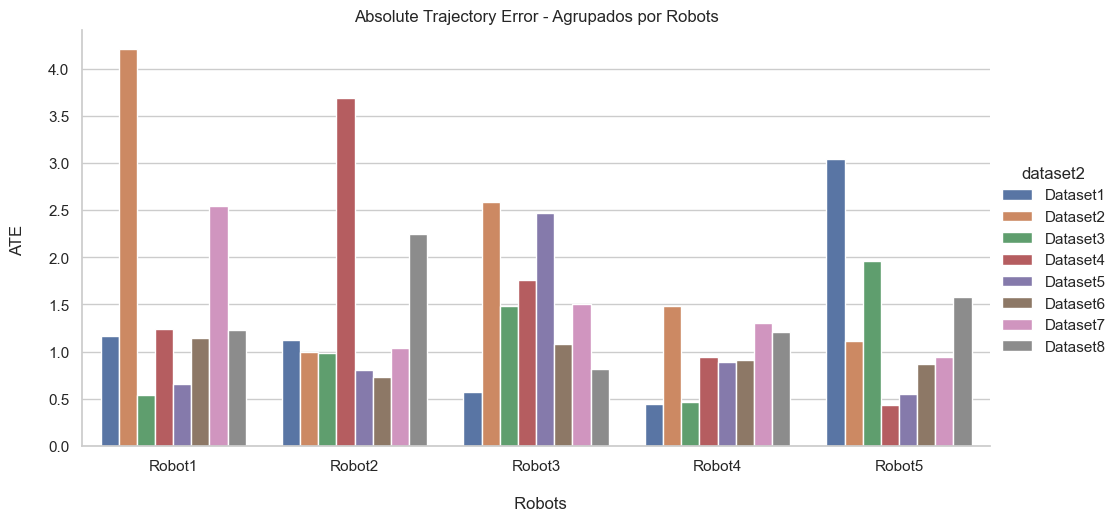

In [33]:
# Representar el ATE de cada dataset y de cada robot en un histograma
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")


# Extraer los últimos 8 caracteres de la etiqueta dataset y ver Dataset_?
# Lo guardo en otra columna para no perder la ruta original al dataset
errors['dataset2'] = errors['dataset'].str[-8:]


# Crear un gráfico de barras para la longitud promedio
g = sns.catplot(data=errors, x='robot', y='ate', hue='dataset2', kind='bar' ,  aspect=2)

# Con estas 5 líneas más abajo puedo girar el título de la etiqueta del eje x 
# y verlas en vertical por si el texto es muy largo y no cabe
# Accede al objeto Axes del gráfico
#ax = g.axes[0, 0]
# Personaliza la rotación de las etiquetas del eje x
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Configurar el título y etiquetas de los ejes
plt.title("Absolute Trajectory Error - Agrupados por Robots")
plt.xlabel("\n  Robots")
plt.ylabel("ATE \n")

# Mostrar el gráfico
plt.show()

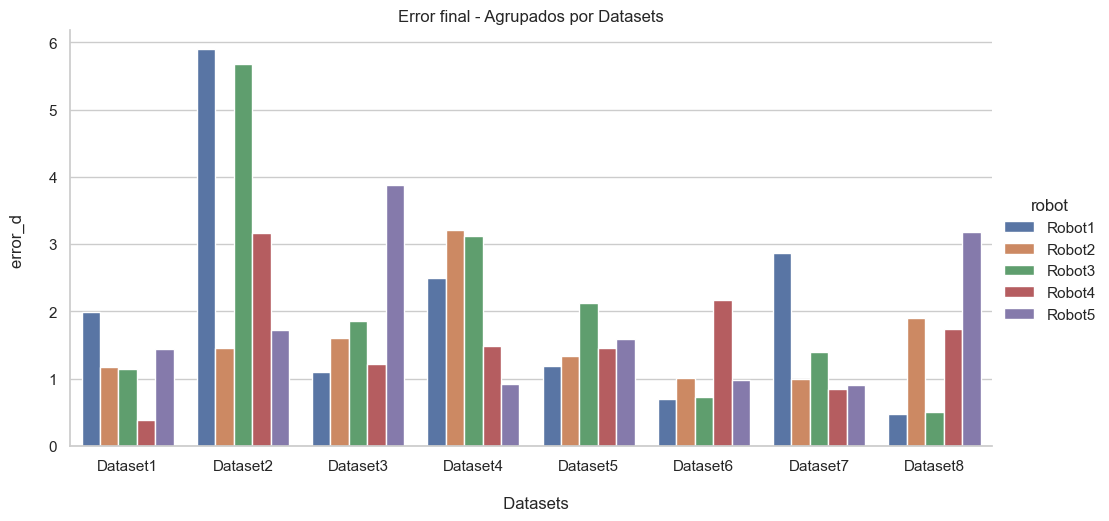

In [34]:
# Representar el error_final (error_d) de cada robot y cada dataset en un histograma
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")


# Extraer los últimos 8 caracteres de la etiqueta dataset y ver Dataset?
# Lo guardo en otra columna para no perder la ruta original al dataset
errors['dataset2'] = errors['dataset'].str[-8:]


# Crear un gráfico de barras para la longitud promedio
g = sns.catplot(data=errors, x='dataset2', y='error_final', hue='robot', kind='bar' ,  aspect=2)

# Con estas 5 líneas más abajo puedo girar el título de la etiqueta del eje x 
# y verlas en vertical por si el texto es muy largo y no cabe
# Accede al objeto Axes del gráfico
#ax = g.axes[0, 0]
# Personaliza la rotación de las etiquetas del eje x
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Configurar el título y etiquetas de los ejes
plt.title("Error final - Agrupados por Datasets")
plt.xlabel("\n  Datasets")
plt.ylabel("error_d \n")

# Mostrar el gráfico
plt.show()

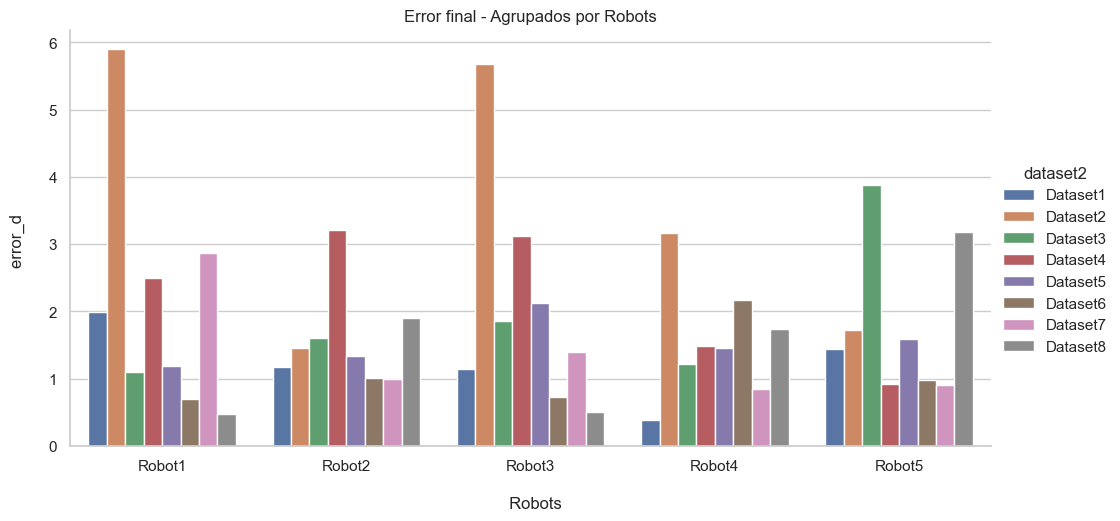

In [35]:
# Representar el error_final (error_d) de cada dataset y cada robot en un histograma
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")


# Extraer los últimos 8 caracteres de la etiqueta dataset y ver Dataset?
# Lo guardo en otra columna para no perder la ruta original al dataset
errors['dataset2'] = errors['dataset'].str[-8:]


# Crear un gráfico de barras para la longitud promedio
g = sns.catplot(data=errors, x='robot', y='error_final', hue='dataset2', kind='bar' ,  aspect=2)

# Con estas 5 líneas más abajo puedo girar el título de la etiqueta del eje x 
# y verlas en vertical por si el texto es muy largo y no cabe
# Accede al objeto Axes del gráfico
#ax = g.axes[0, 0]
# Personaliza la rotación de las etiquetas del eje x
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Configurar el título y etiquetas de los ejes
plt.title("Error final - Agrupados por Robots")
plt.xlabel("\n  Robots")
plt.ylabel("error_d \n")

# Mostrar el gráfico
plt.show()

#### Analize metrics

In [36]:
# Analize the results and provide the mean error metrics across the experiments performed.
errors.describe()

,ate,error_final
count,40.000000,40.000000
mean,1.368569,1.824662
std,0.870882,1.248303
min,0.432254,0.380489
25%,0.851897,1.006263
50%,1.114341,1.454132
75%,1.523825,2.130560
max,4.203368,5.894163


### Analizar métricas

El método `describe()` en el dataframe `errors`nos devuelve una serie de datos estadísticos 
como media, desviación estándar, valores máximos, mínimos, ... 

Fijándonos únicamente en el valor medio de `ATE`, que lo tenemos en *1.369*, podemos decir que:

La gráfica ***Absolute Trajectory Error - Agrupados por Datasets***

- El `Dataset6` es el que *mejor* se comporta con todos los *Robots*.

- El `Dataset2` es el que *peor* se comporta con todos los *Robots*.

La gráfica ***Absolute Trajectory Error - Agrupados por Robots***

- El `Robot4` es el que *mejor* se comporta en todos los *Datasets*.

- Los `Robot3` y `Robot5` son los que *peor* se comportan en conjunto de *Datasets*.


Fijándonos únicamente en el valor medio de `error_final`, que lo tenemos en *1.825*, podemos decir que:

La gráfica ***Error final - Agrupados por Datasets***

- El `Dataset6` es el que *mejor* se comporta también con todos los *Robots*.

- Los `Dataset2` y `Dataset4` son los que *peor* se comportan respecto al conjunto de *Robots*.

La gráfica ***Error final- Agrupados por Robots***

- El `Robot4` es el que *mejor* se comporta también en todos los *Datasets*.

- Los `Robot1` y `Robot3` son los que *peor* se comportan en conjunto de *Datasets*.
